In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [4]:
train_path="/content/augmented_resized_V2/train"

In [5]:
test_path="/content/augmented_resized_V2/test"

In [6]:
val_path="/content/augmented_resized_V2/val"

In [7]:
len(os.listdir(test_path))

5

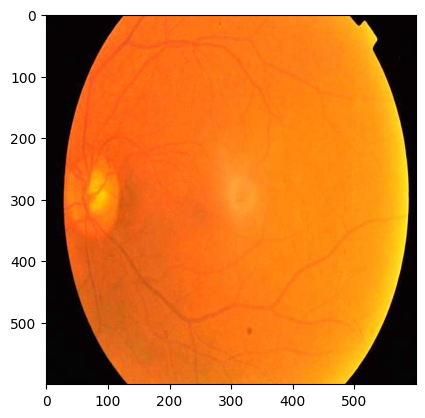

In [8]:
img = cv2.imread("/content/augmented_resized_V2/train/1/0024cdab0c1e-600-FA.jpg")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

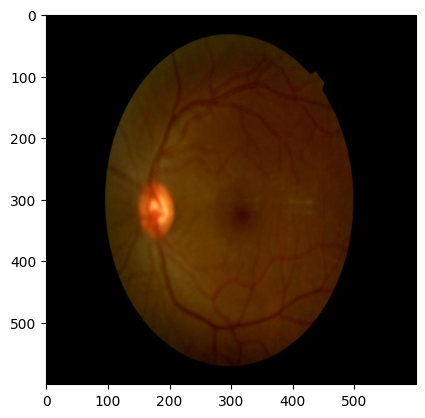

In [9]:
img = cv2.imread("/content/augmented_resized_V2/train/0/005b95c28852-600.jpg")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
batch_size = 34
img_size = (150, 150)

In [11]:
train_generator = keras.utils.image_dataset_from_directory(
    directory=train_path,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=42,
)



Found 115241 files belonging to 5 classes.


In [12]:
validation_generator = keras.utils.image_dataset_from_directory(
    directory=val_path,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=42,
)


Found 14227 files belonging to 5 classes.


In [13]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_generator = train_generator.map(process)
validation_generator = validation_generator.map(process)

In [14]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                        

In [16]:
optimizer = Adam(lr=0.1)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(train_generator, epochs=100, validation_data=validation_generator, callbacks=[early_stopping])

Epoch 1/100
3390/3390 [==============================] - 290s 83ms/step - loss: 1.3494 - accuracy: 0.4977 - val_loss: 1.2169 - val_accuracy: 0.5534
Epoch 2/100
3390/3390 [==============================] - 220s 65ms/step - loss: 1.2232 - accuracy: 0.5190 - val_loss: 1.2154 - val_accuracy: 0.5559
Epoch 3/100
3390/3390 [==============================] - 219s 65ms/step - loss: 1.1876 - accuracy: 0.5257 - val_loss: 1.1306 - val_accuracy: 0.5532
Epoch 4/100
3390/3390 [==============================] - 218s 64ms/step - loss: 1.1048 - accuracy: 0.5595 - val_loss: 1.0602 - val_accuracy: 0.5847
Epoch 5/100
3390/3390 [==============================] - 221s 65ms/step - loss: 1.0258 - accuracy: 0.5970 - val_loss: 0.9369 - val_accuracy: 0.6604
Epoch 6/100
3390/3390 [==============================] - 219s 64ms/step - loss: 0.9529 - accuracy: 0.6362 - val_loss: 0.8836 - val_accuracy: 0.6782
Epoch 7/100
3390/3390 [==============================] - 221s 65ms/step - loss: 0.9039 - accuracy: 0.6575 - val_

In [22]:
test_generator = keras.utils.image_dataset_from_directory(
    directory=test_path,
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=False,

)

Found 14201 files belonging to 5 classes.


In [23]:
test_generator = test_generator.map(process)

In [26]:
# see model history (first five epoches)
pd.DataFrame(history.history).head()

,loss,accuracy,val_loss,val_accuracy
0,1.349368,0.497679,1.216923,0.553384
1,1.223200,0.518965,1.215383,0.555915
2,1.187615,0.525681,1.130559,0.553174
3,1.104847,0.559462,1.060197,0.584733
4,1.025797,0.597001,0.936890,0.660364


In [27]:
# see model history (last five epoches)
pd.DataFrame(history.history).tail()

,loss,accuracy,val_loss,val_accuracy
16,0.597559,0.780000,0.946917,0.699515
17,0.574911,0.789094,1.029753,0.694173
18,0.552173,0.797077,1.075021,0.696985
19,0.533492,0.804393,1.134728,0.691432
20,0.511524,0.812619,1.134498,0.687214


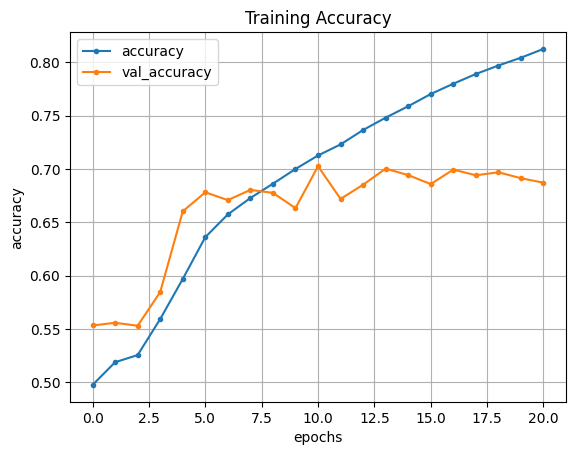

In [29]:
# make plot training accuracy and validation accuracy
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot(marker='.')                  # make plot
plt.grid(),plt.title('Training Accuracy'),plt.xlabel('epochs'),plt.ylabel('accuracy')        # add grid, title and axis labels
plt.show()

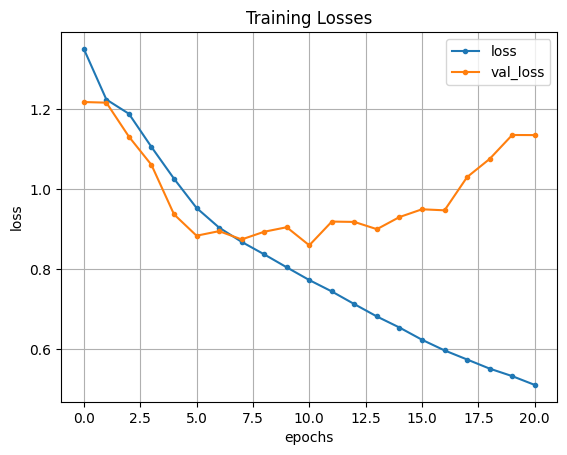

In [30]:
# make plot training losses and validation losses
pd.DataFrame(history.history)[['loss','val_loss']].plot(marker='.')             # make plot
plt.grid(),plt.title('Training Losses'),plt.xlabel('epochs'),plt.ylabel('loss') # add grid, title and axis labels
plt.show()

In [25]:
results=model.evaluate(test_generator,batch_size=None,verbose="auto",sample_weight=None,return_dict=True)# evaluate model
print('Testing results:',results)

418/418 [==============================] - 23s 54ms/step - loss: 1.2620 - accuracy: 0.6104
Testing results: {'loss': 1.2620168924331665, 'accuracy': 0.6103795766830444}


In [34]:
# make save model (weights and configuration)
model.save('DR_Detection.h5',overwrite=True,save_format='h5')                   # make save

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
# make zip model
# make auto download model weights
from google.colab import files                                                  # load file class
files.download('DR_Detection.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>